# Session 2 -  End-to-end Machine Learning project


In [1]:
# some imports

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

# Settings for the visualizations
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import pandas as pd
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# create output folder
if not os.path.exists('output'):
    os.makedirs('output')
if not os.path.exists('output/session1'):
    os.makedirs('output/session1')

In [2]:
from sklearn.model_selection import train_test_split

train_set = pd.read_csv('./dataset/train_set.csv',index_col=0) 
test_set = pd.read_csv('./dataset/test_set.csv',index_col=0)
#train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)

## The problem
The machine learning is to predict the house price, but before that it is imporntat to study the dataset and its features

In [3]:
# print the dataset size
print("There is", train_set.shape[0], "samples")
print("Each sample has", train_set.shape[1], "features")

There is 5432 samples
Each sample has 21 features


In [4]:
# print the top elements from the dataset
train_set

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5427,Reservoir,30 Kinsale St,3,h,851500.0,S,Nelson,22/08/2016,11.2,3073.0,3.0,1.0,1.0,0.0,NaN,1930.0,Darebin,-37.72170,144.99540,Northern Metropolitan,21650.0
5428,Fitzroy North,134 Clauscen St,2,h,1400000.0,S,Nelson,26/08/2017,3.6,3068.0,2.0,1.0,1.0,164.0,93.0,1890.0,NaN,-37.77796,144.98374,Northern Metropolitan,6244.0
5429,Richmond,23a Dickmann St,3,t,975000.0,PI,Jellis,22/08/2016,2.6,3121.0,3.0,1.0,1.0,383.0,NaN,1993.0,Yarra,-37.82480,144.99760,Northern Metropolitan,14949.0


In [5]:
# As it can be seen the database contains several features, some of them numerical and some of them are categorical.
# It is important to check each of the to understand it.

In [6]:
# we can see the type of each features as follows
train_set.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [7]:
# print those categorical features
train_set.select_dtypes(include=['object']).head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
index,,,,,,,,
0,Aberfeldie,241 Buckley St,h,VB,Nelson,12/08/2017,Moonee Valley,Western Metropolitan
1,Northcote,67 Charles St,h,SP,Jellis,20/05/2017,Darebin,Northern Metropolitan
2,Balwyn North,42 Maud St,h,PI,Jellis,15/10/2016,Boroondara,Southern Metropolitan
3,Brunswick,13 Percy St,h,S,Nelson,7/05/2016,Moreland,Northern Metropolitan
4,Templestowe Lower,253 Thompsons Rd,h,VB,hockingstuart,13/08/2016,Manningham,Eastern Metropolitan


In [8]:
# We can check how many different type there is in the dataset using the folliwing line
train_set["Type"].value_counts()

h    3765
u    1191
t     476
Name: Type, dtype: int64

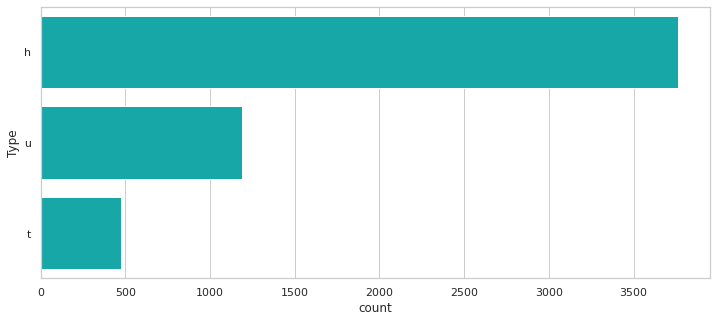

In [9]:
sns.countplot(y="Type", data=train_set, color="c")

It would be interesting to visualize all features (numerical and catergorical) in order to undertand them.

Check out this blog for plotting distribution: https://seaborn.pydata.org/tutorial/distributions.html
+ Seaborn version of this blog can be different from the one intalled in your machine (version 0.11 has been just realeased)

Check out this blog for plotting categorical data: https://seaborn.pydata.org/tutorial/categorical.html

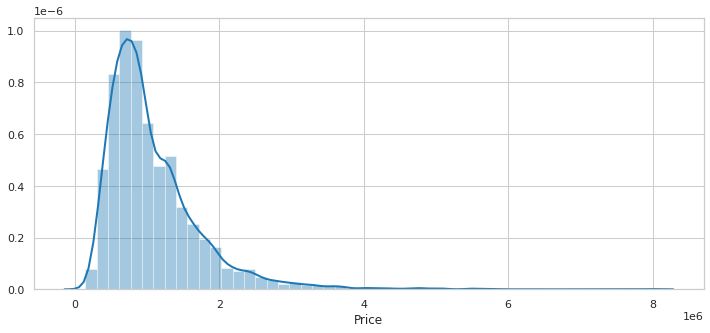

In [10]:
sns.distplot(train_set["Price"])
plt.show()

### Data cleaning

What to do with data with missing values
* Option 1: Remove rows
* Option 2: Remove columns
* Option 3: Impute missing values

In [11]:
housing = train_set.drop("Price", axis=1) # drop labels for training set
housing_labels = train_set["Price"].copy()

In [12]:
#We will impute the missing values

'''
Year Built --> com més gran sigui Landsize, més antic serà (i al revès)
- Tractar NaN yearbuilt: donar valor de la mitjana dels N casos amb major Landsize
- Tractar Nan LandSize considerant el suburbi (mean)
Buildingarea --> com més gran sigui Landsize, més gran serà buildingarea

PropertyCount --> com més Landsize, menor serà el Propertycount

Quantes més habitacions tingui, major serà LandSize i BuildingArea
'''
'''land = pd.DataFrame(train_set.groupby('Suburb', as_index=False)['Landsize'].mean())
sub = land['Suburb']
la = land['Landsize']
landsize_dict = dict(zip(sub, la))'''

"land = pd.DataFrame(train_set.groupby('Suburb', as_index=False)['Landsize'].mean())\nsub = land['Suburb']\nla = land['Landsize']\nlandsize_dict = dict(zip(sub, la))"

In [13]:
#numerical Nan
def numerical_nan(data):
    data = data.fillna(data.mean())
    return data

In [14]:
#outliers
def impute_outliers(data):
    quan_ba_low = data.quantile(0.15)
    quan_ba_high = data.quantile(0.95)
        
    maximum_in_quantile = data.quantile(0.94)
    minimum_in_quantile = data.quantile(0.16)

    data.loc[data < quan_ba_low, data] = minimum_in_quantile
    data.loc[data > quan_ba_high, data] = maximum_in_quantile
    return data

### Pipeline

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#after nan, we could sum some features
numeric_pipeline = Pipeline([
        ('numericalNan',FunctionTransformer(func = numerical_nan,validate=False)),
        ('impute_outliers',SimpleImputer(strategy = 'most_frequent')),
        ('std_scaler', StandardScaler())
        ])

categorical_pipeline = Pipeline([
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
    ])

In [16]:
from sklearn.compose import ColumnTransformer
num_attribs0 = ['Landsize', 'BuildingArea', 'YearBuilt', 'Car', 'Distance', 'Propertycount', 'Rooms', 'Bedroom2', 'Bathroom']
cat_attribs = ["Type", "Regionname"]

full_pipeline = ColumnTransformer([
        ("num", numeric_pipeline, num_attribs0),
        ("cat", categorical_pipeline, cat_attribs),
    ])



housing_prepared = full_pipeline.fit_transform(housing)

In [17]:
print(type(housing))
print(housing_prepared.shape)

<class 'pandas.core.frame.DataFrame'>
(5432, 20)


### Select and train a model

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
#Neighbors

from sklearn import neighbors

n_neighbors = 3 # you can modify this paramenter (ONLY THIS ONE!!!)

knn_reg = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors)
## fit the model
knn_reg.fit(housing_prepared, housing_labels)

KNeighborsRegressor(n_neighbors=3)

In [20]:
#Regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
## fit the model
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [21]:
#Decision tree
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [22]:
#SVM
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)

svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

666241.7562898597

In [23]:
#RandomForest
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=10,
                      random_state=42)

### Cross validation

In [24]:
from sklearn.model_selection import cross_val_score

def display_scores(scores,model_name = None):
    if(model_name):
        print("----",model_name,"----")
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

models = [(lin_reg,"lin_reg"),
          (tree_reg,"Decision Tree"),
          (knn_reg,"KNN-Regressor"),
          (forest_reg,'Random Forest'),
          (svm_reg,'SVM Regressor')]

for model in models:
    scores = cross_val_score(model[0], housing_prepared, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
    display_scores(-scores, model[1])

---- lin_reg ----
Mean: 433322.63045463635
Standard deviation: 57143.75471130491
---- Decision Tree ----
Mean: 428283.6066828345
Standard deviation: 37521.12365040957
---- KNN-Regressor ----
Mean: 402127.2952386256
Standard deviation: 42014.58961992513
---- Random Forest ----
Mean: 329469.201341238
Standard deviation: 30257.4928379979
---- SVM Regressor ----
Mean: 665289.4962439399
Standard deviation: 43746.48692252389


### Final model

In [25]:
X_test = test_set

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = forest_reg.predict(X_test_prepared)

df_output = pd.DataFrame(final_predictions)
df_output = df_output.reset_index()
df_output.columns = ['index','Price']

df_output.to_csv('output/session1/problem_submission.csv',index=False)